# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

In [2]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.layers import Dense,Flatten

# Importing datasets and Normalising 

In [3]:
datagen = ImageDataGenerator(rescale = 1/255.)

train_data= datagen.flow_from_directory('dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_data = datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_data = datagen.flow_from_directory('dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

                                            

Found 1000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [4]:
from glob import glob
folders = glob('dataset/Train/*')

# Building VGG19 Architecture 

In [5]:
vgg = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

In [6]:
vgg.trainable=False
inputs = tf.keras.Input(shape=(224,224,3))
x = Flatten()(vgg(inputs,training=False))
outputs=Dense(10,activation ="softmax")(x)
model = tf.keras.Model(inputs,outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                250890    
Total params: 20,275,274
Trainable params: 250,890
Non-trainable params: 20,024,384
_________________________________________________________________


# Compiling and Fitting Model

In [8]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics='accuracy')

In [9]:
model.fit_generator(train_data,epochs=5,validation_data=val_data)

Epoch 1/5


C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


32/32 [==============================] - 108s 3s/step - loss: 2.7607 - accuracy: 0.3250 - val_loss: 1.8476 - val_accuracy: 0.4033
Epoch 2/5
32/32 [==============================] - 110s 3s/step - loss: 0.7196 - accuracy: 0.7550 - val_loss: 1.1624 - val_accuracy: 0.6233
Epoch 3/5
32/32 [==============================] - 112s 4s/step - loss: 0.2982 - accuracy: 0.9320 - val_loss: 0.8367 - val_accuracy: 0.7300
Epoch 4/5
32/32 [==============================] - 109s 3s/step - loss: 0.1383 - accuracy: 0.9960 - val_loss: 0.7900 - val_accuracy: 0.7367
Epoch 5/5
32/32 [==============================] - 110s 3s/step - loss: 0.0844 - accuracy: 1.0000 - val_loss: 0.7534 - val_accuracy: 0.7633


# Prediciting Model

In [10]:
t_data = datagen.flow_from_directory('dataset/t/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
                                            

Found 3 images belonging to 1 classes.


In [11]:
y = model.predict_generator(t_data)

C:\Users\adity\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


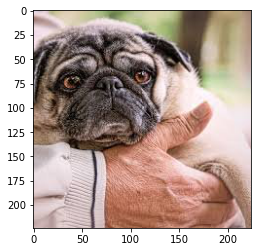

In [12]:
import matplotlib.pyplot as plt
plt.imshow(t_data[0][0][0])

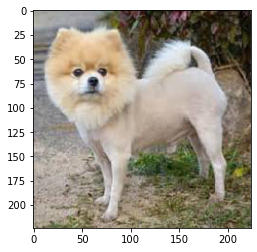

In [13]:
plt.imshow(t_data[0][0][1])

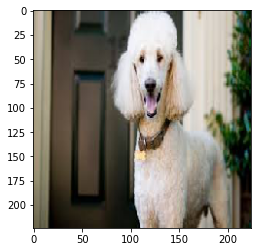

In [14]:
plt.imshow(t_data[0][0][2])

In [15]:
pci=np.argmax(y,axis=1)
labels=(train_data.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in pci]
print(pci)
print(labels)


[8 6 7]
{'Bulldog': 0, 'Chihuahua': 1, 'French Bulldog': 2, 'German Shepherd': 3, 'Golden Retriever': 4, 'Labrador Retriver': 5, 'Pomeranian': 6, 'Poodle': 7, 'Pug': 8, 'Siberian Husky': 9}


In [16]:
print(predictions)

['Pug', 'Pomeranian', 'Poodle']


# Saving Model

In [17]:
model.save('dog_breed_clsf.h5')